To download the dataset,Click <button><a href='https://www.kaggle.com/code/kymdroid/weather-prediction-cnn'>here</a></button>

Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Sequential,layers
from sklearn.model_selection import train_test_split
import glob

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd drive/MyDrive

/content/drive/MyDrive


Fetch the training Data using glob

In [ ]:
snow = glob.glob('dataset/snow/*.jpg')[0:100]
sandstorm = glob.glob('dataset/sandstorm/*.jpg')[0:100]
rime = glob.glob('dataset/rime/*.jpg')[0:100]
rainbow = glob.glob('dataset/rainbow/*.jpg')[0:100]
rain = glob.glob('dataset/rain/*.jpg')[0:100]
lightning = glob.glob('dataset/lightning/*.jpg')[0:100]
hail= glob.glob('dataset/hail/*.jpg')[0:100]
glaze = glob.glob('dataset/glaze/*.jpg')[0:100]
frost = glob.glob('dataset/frost/*.jpg')[0:100]
fogsmog = glob.glob('dataset/fogsmog/*.jpg')[0:100]
dew = glob.glob('dataset/dew/*.jpg')[0:100]

Find the number of images of all classes

In [ ]:
print(f"Number of images are:\nsnow:{len(snow)}\nsandstorm:{len(sandstorm)}\nrime:{len(rime)}\nrainbow:{len(rainbow)}\nrain:{len(rain)}\nlightning:{len(lightning)}\nhail:{len(hail)}\nglaze:{len(glaze)}\nfrost:{len(frost)}\nfogsmog:{len(fogsmog)}\ndew:{len(dew)}")

Number of images are:
snow:100
sandstorm:100
rime:100
rainbow:100
rain:100
lightning:100
hail:100
glaze:100
frost:100
fogsmog:100
dew:100


Store all the images inside a list and create a list with the corresponding labels

In [ ]:
d = {0:'snow',1:'sandstorm',2:'rime',3:'rainbow',4:'rain',5:'lightning',6:'hail',7:'glaze',8:'frost',9:'fogsmog',10:'dew'}

For Dataset

In [ ]:
images = []
label = []

for i in snow:
    img = plt.imread(i)
    images.append(img)
    label.append(0)
    
for i in sandstorm:
    img = plt.imread(i)
    images.append(img)
    label.append(1)

for i in rime:
    img = plt.imread(i)
    images.append(img)
    label.append(2)
    
for i in rainbow:
    img = plt.imread(i)
    images.append(img)
    label.append(3)


for i in rain:
    img = plt.imread(i)
    images.append(img)
    label.append(4)
    
for i in lightning:
    img = plt.imread(i)
    images.append(img)
    label.append(5)

for i in hail:
    img = plt.imread(i)
    images.append(img)
    label.append(6)
    
for i in glaze:
    img = plt.imread(i)
    images.append(img)
    label.append(7)
    
for i in frost:
    img = plt.imread(i)
    images.append(img)
    label.append(8)

for i in fogsmog:
    img = plt.imread(i)
    images.append(img)
    label.append(9)
    
for i in dew:
    img = plt.imread(i)
    images.append(img)
    label.append(10)

Shuffle both image list and label list using shuffle function from sklearn utils

In [ ]:
images, label = shuffle(images, label, random_state=100)

Plot a few images from our shuffled list with its corresponding label

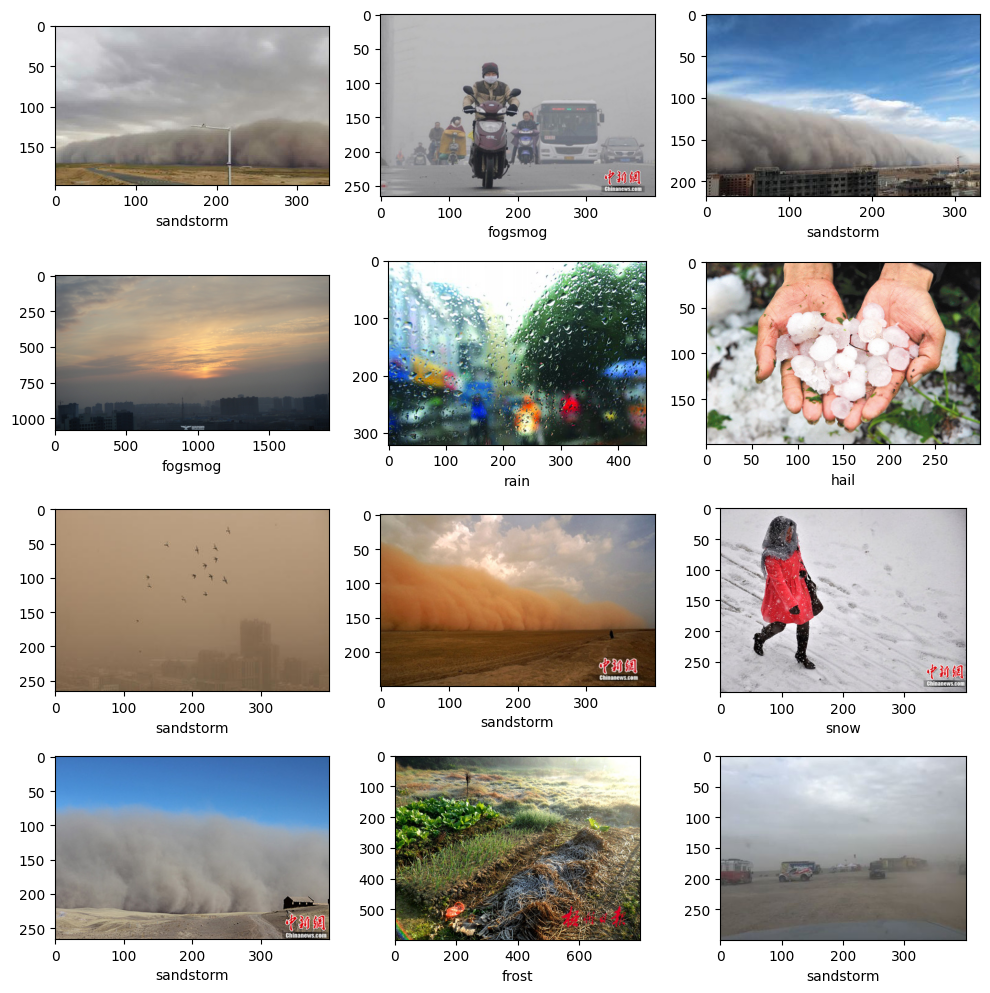

In [ ]:
plt.figure(figsize=(10,10))

for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(images[i])
    plt.xlabel(d[label[i]])
plt.tight_layout()

Check the shape of the first 10 images in our list

In [ ]:
for i in range(10):
    print(images[i].shape)

(197, 340, 3)
(265, 400, 3)
(218, 330, 3)
(1080, 1920, 3)
(321, 450, 3)
(199, 300, 3)
(266, 400, 3)
(250, 400, 3)
(300, 400, 3)
(266, 400, 3)


Reshape the images to 224x224

In [ ]:
X_img = []

for i in images:
    X_img.append(resize(i, (224,224,3)))

X_img= np.array(X_img)

Create numpy arrays named y_train from the label lists we created earlier

In [ ]:
y_label = np.array(label)

Plot some of our reshaped images

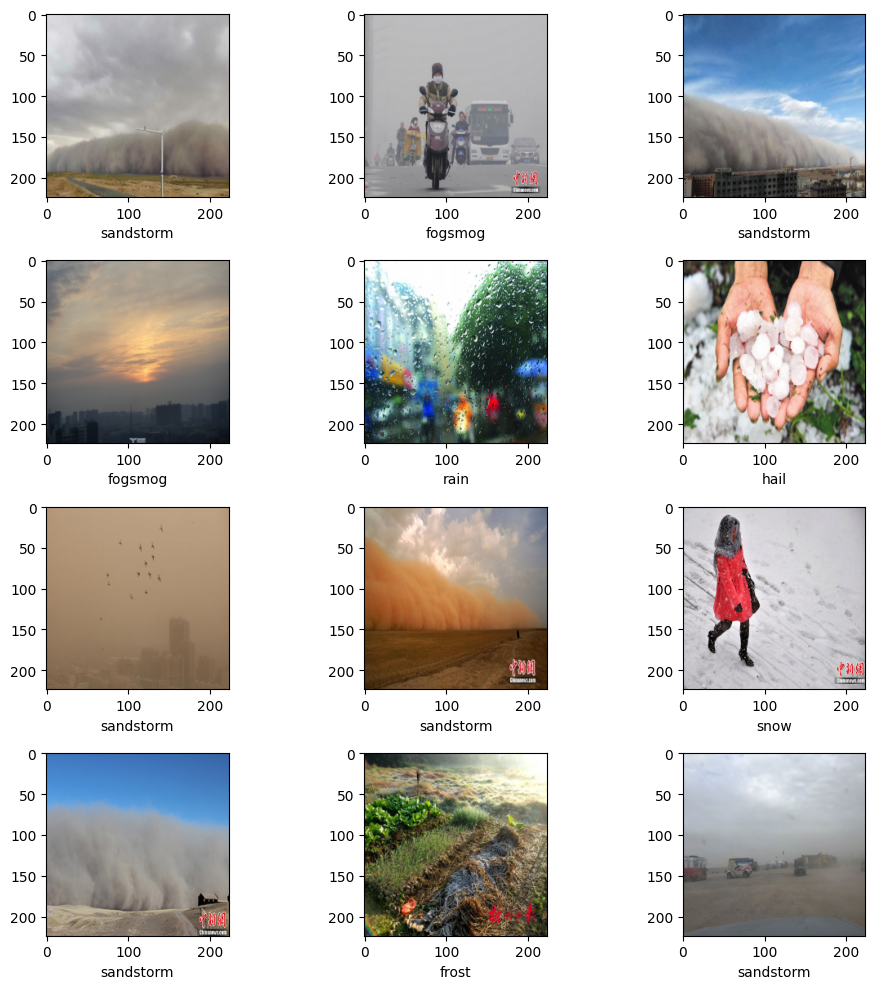

In [ ]:
plt.figure(figsize=(10,10))

for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(X_img[i])
    plt.xlabel(d[y_label[i]])
plt.tight_layout()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_img,y_label,random_state=100)

Check the shape of X_train and X_test and y_train and y_test 

In [ ]:
print(f"Shape of X_train is: {X_train.shape}\nShape of X_test is: {X_test.shape}\nShape of y_train is: {y_train.shape}\nShape of y_test is: {y_test.shape}")

Shape of X_train is: (825, 224, 224, 3)
Shape of X_test is: (275, 224, 224, 3)
Shape of y_train is: (825,)
Shape of y_test is: (275,)



Create a keras Sequential model with convolution layers, Flatten and Hidden layers

In [ ]:
model = Sequential([
    layers.Conv2D(20, (3,3), activation = 'relu', input_shape = (224, 224, 3)),
    layers.MaxPool2D(),
    
    layers.Conv2D(38, (3,3), activation = 'relu'),
    layers.MaxPool2D(),

    layers.Flatten(),
    
    layers.Dense(62, activation = 'relu'),
    layers.Dense(11, activation = 'sigmoid')
])

Compile the model using 'sparse_categorical_crossentropy' for loss

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Checking the summary of our model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 20)      560       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 20)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 38)      6878      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 38)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 110808)            0         
                                                                 
 dense_2 (Dense)             (None, 62)               

Train the model and include a validation data with validation_split


In [ ]:
model.fit(X_train, y_train, epochs = 10, validation_split = 0.04)

Epoch 1/10
25/25 [==============================] - 45s 2s/step - loss: 0.3441 - accuracy: 0.9179 - val_loss: 1.2209 - val_accuracy: 0.6061
Epoch 2/10
25/25 [==============================] - 44s 2s/step - loss: 0.2201 - accuracy: 0.9444 - val_loss: 1.6689 - val_accuracy: 0.4848
Epoch 3/10
25/25 [==============================] - 44s 2s/step - loss: 0.1642 - accuracy: 0.9646 - val_loss: 1.6773 - val_accuracy: 0.4242
Epoch 4/10
25/25 [==============================] - 44s 2s/step - loss: 0.1137 - accuracy: 0.9697 - val_loss: 1.7542 - val_accuracy: 0.4545
Epoch 5/10
25/25 [==============================] - 45s 2s/step - loss: 0.1365 - accuracy: 0.9722 - val_loss: 1.6453 - val_accuracy: 0.5455
Epoch 6/10
25/25 [==============================] - 45s 2s/step - loss: 0.2410 - accuracy: 0.9306 - val_loss: 2.8317 - val_accuracy: 0.4848
Epoch 7/10
25/25 [==============================] - 44s 2s/step - loss: 0.2183 - accuracy: 0.9470 - val_loss: 1.6945 - val_accuracy: 0.5455
Epoch 8/10
25/25 [==

Evaluate the model

In [ ]:
model.evaluate(X_train, y_train)

26/26 [==============================] - 13s 499ms/step - loss: 0.1525 - accuracy: 0.9709


[0.1525149792432785, 0.9709091186523438]

Make predictions with X_test

In [ ]:
pred = model.predict(X_test)

9/9 [==============================] - 5s 504ms/step


In [ ]:
pred

array([[2.2095769e-04, 9.9961197e-01, 2.5711348e-02, ..., 7.5388911e-05,
        4.4348396e-02, 1.1118530e-01],
       [2.2293949e-01, 1.5584581e-01, 2.5680482e-01, ..., 6.7003584e-03,
        4.8844564e-01, 2.3810109e-01],
       [3.7603927e-01, 1.2978362e-01, 6.2999231e-01, ..., 3.7597802e-03,
        9.4775772e-01, 8.8944156e-03],
       ...,
       [9.8456913e-01, 2.9459193e-03, 9.6737707e-01, ..., 9.9999833e-01,
        1.3747234e-05, 1.3731143e-01],
       [9.8240018e-01, 6.4496166e-04, 5.0613433e-01, ..., 5.3650159e-01,
        2.6952746e-04, 1.7808719e-02],
       [7.9642946e-04, 9.9997610e-01, 4.0562348e-03, ..., 8.7962377e-05,
        9.8821151e-01, 5.0787151e-02]], dtype=float32)

Use np.argmax to fetch indices of max element of the array and store the values in a list



In [ ]:
y_pred = [np.argmax(i) for i in pred]

In [ ]:
y_pred[:5]

[3, 5, 3, 7, 8]

Plot X_test with label from our prediction

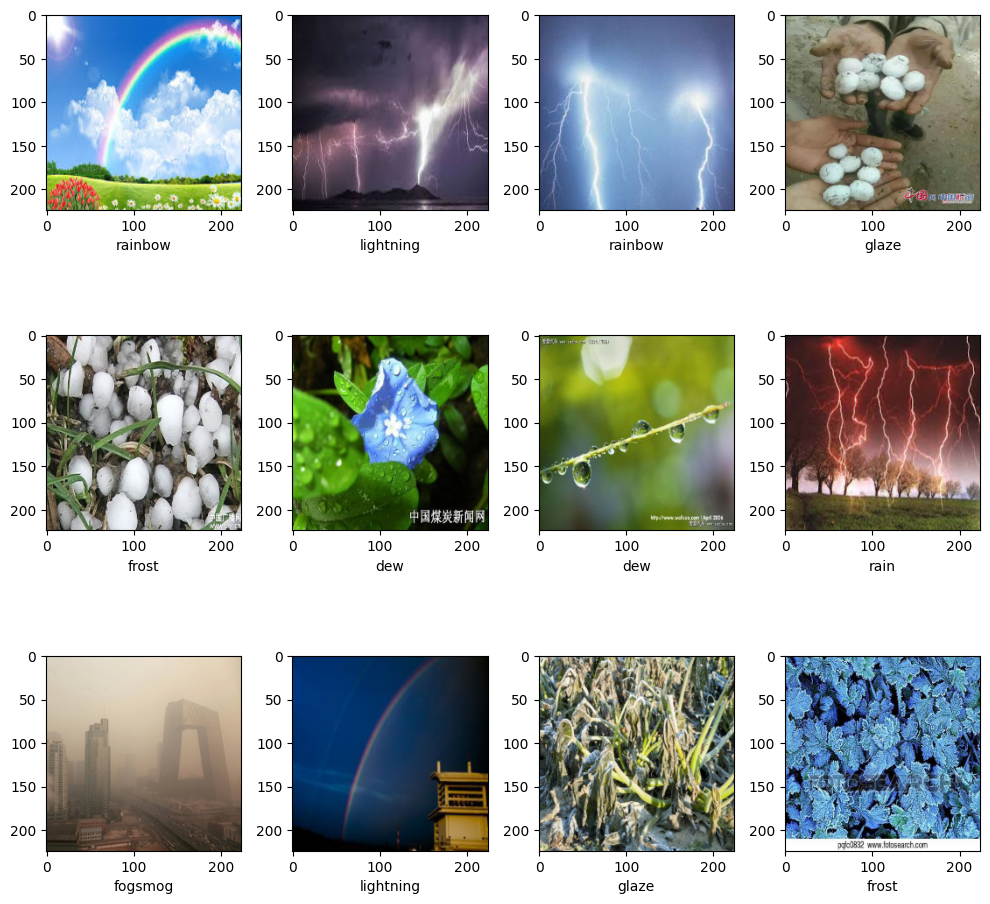

In [ ]:
plt.figure(figsize = (10,10))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_test[i])
    plt.xlabel(d.get(y_pred[i]))
plt.tight_layout()

Visualise confusion matrix on a heatmap

<Axes: >

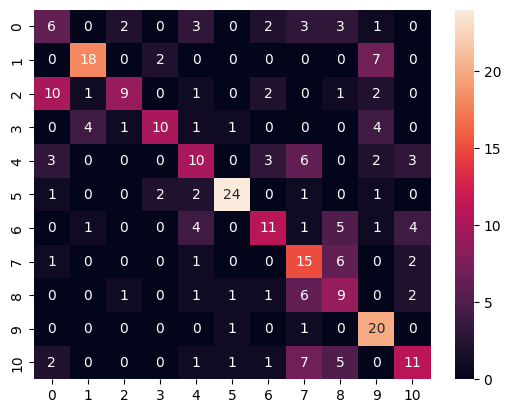

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)